<a href="https://colab.research.google.com/github/FerriVinicius/Projeto-E/blob/main/G6_PROJETO_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/FerriVinicius/Projeto-E/refs/heads/main/PRESCRIPTIONS.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/FerriVinicius/Projeto-E/refs/heads/main/ADMISSIONS.csv")

In [ ]:
for col in df.columns:
    print(f'"{col}"')

"row_id"
"subject_id"
"hadm_id"
"icustay_id"
"startdate"
"enddate"
"drug_type"
"drug"
"drug_name_poe"
"drug_name_generic"
"formulary_drug_cd"
"gsn"
"ndc"
"prod_strength"
"dose_val_rx"
"dose_unit_rx"
"form_val_disp"
"form_unit_disp"
"route"


In [5]:
df = df[[#'row_id',
            'subject_id',
            'hadm_id', #'icustay_id',
            'startdate', 'enddate',
            'drug_type', 'drug', 'drug_name_poe', 'drug_name_generic',
            'formulary_drug_cd',
            'gsn', #'ndc',
            'prod_strength', 'dose_val_rx',
            'dose_unit_rx', #'form_val_disp', 'form_unit_disp',
            'route'
            ]].copy()

df2 = df2[[#'row_id',
            'subject_id', 'hadm_id', 'admittime', 'dischtime',
            'deathtime', 'admission_type', #'admission_location',
            #'discharge_location', 'insurance', 'language', 'religion',
            #'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
            #'hospital_expire_flag', 'has_chartevents_data'
            ]].copy()

In [6]:
df = df.rename(columns={'subject_id':"ID_Patient",
                            'hadm_id':'ID_medical_record',
                            'startdate':"Start_date",
                            'enddate':"End_date",
                            'drug_type':'Drug_type',
                            'drug':'Popular_drug_name',
                            'drug_name_poe':'Commercial_drug_name',
                            'drug_name_generic':'Generic_drug_name',
                            'formulary_drug_cd':'Drug_code',
                            'prod_strength':"Dose_strength",
                            'dose_val_rx':'Dose_value',
                            'dose_unit_rx':"Dose_unit",
                            'route':'Administration'})

In [7]:
df["Start_date"] = pd.to_datetime(df["Start_date"])
df["End_date"] = pd.to_datetime(df["End_date"])

<Axes: ylabel='Drug_code'>

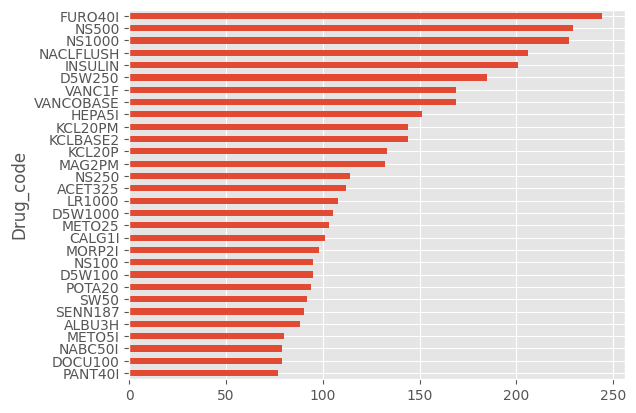

In [ ]:
df["Drug_code"].value_counts().head(30).sort_values().plot(kind="barh", )


In [ ]:
df["Drug_code"].unique()

#or:

#Drugs = [ ]
#for code in df["Drug_code"]:
#    if code not in Drugs:
#        Drugs.append(code)
#print(Drugs)

array(['PNEU25I', 'BISA5', 'BISA10R', 'SENN187', 'DOCU100L', 'HEPA5I',
       'SIMV10', 'ASA81', 'DONE5', 'GABA100', 'MEMA5', 'TOLT1', 'TOPR25',
       'TAMS.4', 'DOCU100', 'NACLFLUSH', 'GUAI10', 'ALBU17H', 'AMLO5',
       'FINA5', 'LEVO75', 'TIOT', 'ASA325', 'ZITHR250', 'PRED20',
       'SODI65S', 'HEPA10SYR', 'MVI', 'FERR325', 'IPRA2H', 'ALBU3H',
       'SERT100', 'SIMV40', 'LEVO100', 'ALLO100', 'PANT40', 'FURO40I',
       'CARV3125', 'METO25', 'METO5I', 'LACT30L', 'RIFA200', 'FENT2.550',
       'MIDA100', 'PROP100IG', 'ATRO1I', 'CHLO15L', 'IPRAPF',
       'PROAIR8.5H', 'MORP2I', 'NS451000', 'VIAL', 'NS500', 'VANCOBASE',
       'NS/MBP100I', 'METRBASE', 'D5W100', 'D5W250', 'NS1000', 'MORPD5W',
       'PANT40I', 'VANC1F', 'CEFE2I', 'METR500PM', 'CEFE1I', 'FURO100I',
       'LEVO4I', 'MORP100PM', 'PERC', 'PARO10', 'ASCO500', 'CREO10',
       'ACET325', 'ONDAN4I', 'DIPH25', 'CIPR500', 'GLYC17', 'MAG2PM',
       'NEUT', 'MORP15', 'ACET20/4I', 'MORP30', 'MORP4I', 'ALBU25',
       'VALS160

In [8]:
#PACIENTES COM MULTIPLAS PRESCRIÇÕES (EM TODAS AS INTERNAÇÕES)

prescription_counts = df.groupby('ID_Patient').size().sort_values().reset_index(name='prescription_count')
multiple_prescriptions = prescription_counts[prescription_counts['prescription_count'] > 1]
print(multiple_prescriptions)

    ID_Patient  prescription_count
0        10064                  15
1        42458                  15
2        44222                  19
3        42275                  20
4        42033                  20
..         ...                 ...
89       10061                 314
90       10124                 315
91       10126                 437
92       40310                 893
93       41976                1158

[94 rows x 2 columns]


In [9]:
#INTERNAÇÕES COM MULTIPLAS PRESCRIÇÕES (DUAS OU MAIS PODEM PERTENCER AO MESMO PACIENTE)

prescription_counts = df.groupby('ID_medical_record').size().sort_values().reset_index(name='prescription_count')
multiple_prescriptions = prescription_counts[prescription_counts['prescription_count'] > 1]
print(multiple_prescriptions)

     ID_medical_record  prescription_count
0               175880                  12
1               111761                  15
2               159647                  15
3               131048                  18
4               192189                  19
..                 ...                 ...
117             170883                 244
118             139932                 279
119             145203                 314
120             160445                 437
121             186361                 784

[122 rows x 2 columns]


In [10]:
#RELAÇÃO DE PACIENTES, ADMISSÕES E QUANTIDADE DE PRESCRIÇÕES MÉDICAS

admissions_per_patient = df.groupby('ID_Patient')['ID_medical_record'].nunique()
admissions_per_patient.columns = ['ID_Patient', 'Admissions_count']
prescriptions_per_patient = df.groupby('ID_Patient').size().reset_index(name='Prescriptions_count')
#patient_info = pd.merge(admissions_per_patient, prescriptions_per_patient, on='ID_Patient').sort_values(by='Admissions_count', ascending=False)
patients_admission_info = pd.merge(admissions_per_patient, prescriptions_per_patient, on='ID_Patient').sort_values(by='Prescriptions_count', ascending=False)
print(patients_admission_info)

    ID_Patient  ID_medical_record  Prescriptions_count
60       41976                 15                 1158
50       40310                  2                  893
41       10126                  1                  437
40       10124                  2                  315
19       10061                  1                  314
..         ...                ...                  ...
62       42033                  1                   20
68       42275                  1                   20
92       44222                  1                   19
20       10064                  1                   15
77       42458                  1                   15

[94 rows x 3 columns]


In [11]:
#QUANTIDADE DE FARMACOS DIFERENTES ADMINISTRADOS POR PACIENTE (USANDO CÓDIGO NDC DAS DROGAS)

dif_drugs_per_patient = df.groupby('ID_Patient')['gsn'].nunique()
dif_drugs_per_patient = dif_drugs_per_patient.reset_index(name='Dif_drugs_count')
patients_info = pd.merge(patients_admission_info, dif_drugs_per_patient, on="ID_Patient").sort_values(by='Prescriptions_count', ascending=False)
print(patients_info)

    ID_Patient  ID_medical_record  Prescriptions_count  Dif_drugs_count
0        41976                 15                 1158              166
1        40310                  2                  893              176
2        10126                  1                  437               72
3        10124                  2                  315               99
4        10061                  1                  314               80
..         ...                ...                  ...              ...
89       42033                  1                   20               14
90       42275                  1                   20               15
91       44222                  1                   19               17
92       10064                  1                   15                8
93       42458                  1                   15               15

[94 rows x 4 columns]


In [12]:
#QUANTIDADE DE FARMACOS DIFERENTES ADMINISTRADOS POR PACIENTE (USANDO O NOME POPULAR DAS DROGAS)

dif_drugs_per_patient = df.groupby('ID_Patient')['Popular_drug_name'].nunique()
dif_drugs_per_patient = dif_drugs_per_patient.reset_index(name='Dif_drugs_count')
patients_info = pd.merge(patients_admission_info, dif_drugs_per_patient, on="ID_Patient").sort_values(by='Prescriptions_count', ascending=False)
print(patients_info)

    ID_Patient  ID_medical_record  Prescriptions_count  Dif_drugs_count
0        41976                 15                 1158              141
1        40310                  2                  893              148
2        10126                  1                  437               75
3        10124                  2                  315               87
4        10061                  1                  314               69
..         ...                ...                  ...              ...
89       42033                  1                   20               14
90       42275                  1                   20               16
91       44222                  1                   19               15
92       10064                  1                   15                9
93       42458                  1                   15               14

[94 rows x 4 columns]


In [ ]:
######FORTE INCONSISTENCIA ENTRE OS INPUTS DE NOME E CÓDIGO DE DROGAS (ALÉM DE ERRO HUMANO: CODIGOS DIFERENTES PARA DOSAGENS, VIA DE ADMINISTRAÇÃO, ETC.)

In [13]:
##################################QUANTIDADE DE FARMACOS DIFERENTES ADMINISTRADOS POR PACIENTE (USANDO OS DÍGITOS 5, 6, 7 E 8 DO CÓDIGO NDC
#(11 DÍGITOS: 5 PRIMEIROS - FABRICANTE / 4 DO MEIO - IGRENDIENTE, FORÇA, DOSAGEM E MEIO DE ADMINISTRAÇÃO / 2 FINAIS - EMBALAGEM) DAS DROGAS)

dif_drugs_per_patient = df.groupby('ID_Patient')['Popular_drug_name'].nunique()
dif_drugs_per_patient = dif_drugs_per_patient.reset_index(name='Dif_drugs_count')
patients_info = pd.merge(patients_admission_info, dif_drugs_per_patient, on="ID_Patient").sort_values(by='Prescriptions_count', ascending=False)
print(patients_info)

    ID_Patient  ID_medical_record  Prescriptions_count  Dif_drugs_count
0        41976                 15                 1158              141
1        40310                  2                  893              148
2        10126                  1                  437               75
3        10124                  2                  315               87
4        10061                  1                  314               69
..         ...                ...                  ...              ...
89       42033                  1                   20               14
90       42275                  1                   20               16
91       44222                  1                   19               15
92       10064                  1                   15                9
93       42458                  1                   15               14

[94 rows x 4 columns]
